In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

MACHINA_DATA_DIR = os.path.join(repo_dir, 'src/data/machina_sims')


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [18]:
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'cornflowerblue', 'hotpink', 'grey', 'saddlebrown', 'darkorange', 'purple', 'red', 'black', 'black', 'black', 'black']]

def find_labelings_all_mutation_trees(cluster_fn, all_mut_trees_fn, ref_var_fn, use_gen_dist=False):
    cluster_label_to_idx = mach_util.get_cluster_label_to_idx(cluster_fn, ignore_polytomies=True)
    data = mach_util.get_adj_matrices_from_all_mutation_trees(all_mut_trees_fn, cluster_label_to_idx, is_sim_data=True)
    print("num trees:", len(data))
    i = 1
    for adj_matrix, pruned_cluster_label_to_idx in data:
        print(f"TREE {i}")
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)
        ref_matrix, var_matrix, unique_sites= mach_util.get_ref_var_matrices_from_machina_sim_data(ref_var_fn, 
                                                                                                   pruned_cluster_label_to_idx=pruned_cluster_label_to_idx,
                                                                                                   T=T)
        G = mach_util.get_genetic_distance_tensor_from_sim_adj_matrix(T, pruned_cluster_label_to_idx)
        G = G if use_gen_dist else None
        print("G\n", G)
        idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
        print(idx_to_label)
        print(unique_sites)   
        primary_idx = unique_sites.index('P')
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=1.0, gen_dist=0.5)
        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                    weights=weights, p=r, node_idx_to_label=idx_to_label, G=G,
                                                    batch_size=16, init_temp=30, final_temp=0.01, custom_colors=custom_colors, show_top_trees=False)
        print("*"*100)
        i += 1

import pydot
from IPython.display import Image, display

def visualize_ground_truth(tree_fn, graph_fn):
    def view_pydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)
    
    (graph,) = pydot.graph_from_dot_file(tree_fn)
    view_pydot(graph)

    (graph,) = pydot.graph_from_dot_file(graph_fn)
    view_pydot(graph)
        
        

Ground truth


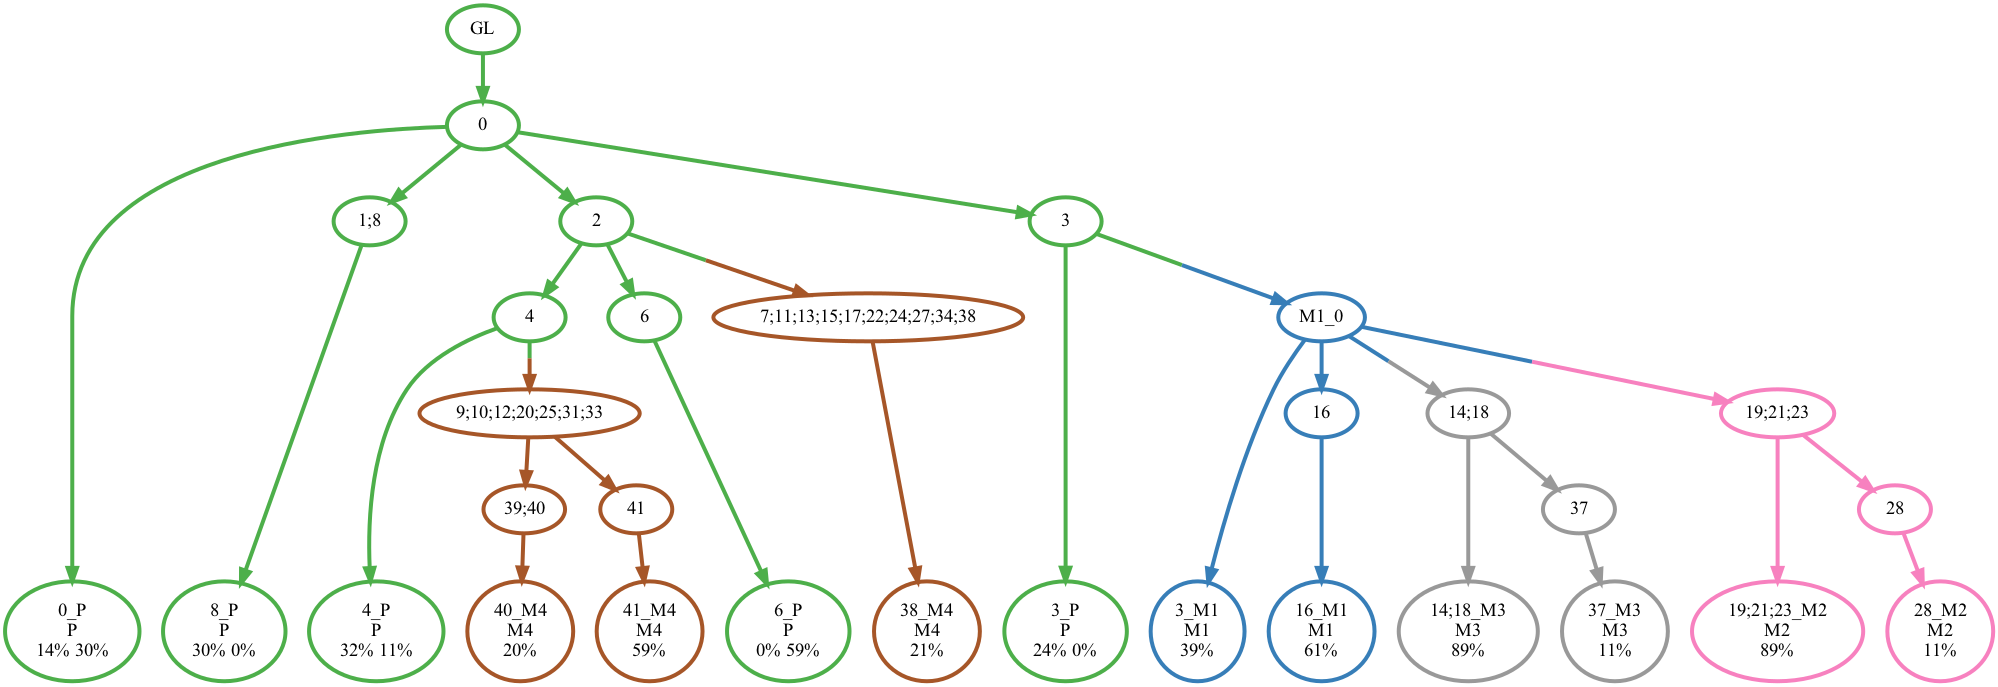

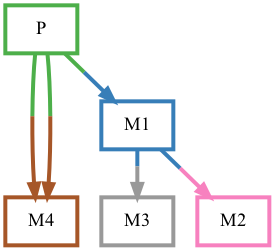

In [25]:
num_sites = "m5"
mig_type = "S"
SEED = 31
SIM_DATA_DIR = os.path.join(MACHINA_DATA_DIR, num_sites, mig_type)

print("Ground truth")
visualize_ground_truth(os.path.join(SIM_DATA_DIR, f"T_seed{SEED}.dot"), os.path.join(SIM_DATA_DIR, f"G_seed{SEED}.dot"))


num trees: 36
TREE 1
G
 None
{0: '0', 1: '2', 2: '3', 3: '4', 4: '6', 5: '1;8', 6: '16', 7: '14;18', 8: '19;21;23', 9: '28', 10: '37', 11: '7;9;10;11;12;13;15;17;20;22;24;25;27;31;33;34;38;39;40;41'}
['P', 'M1', 'M2', 'M3', 'M4']
weights:
{'comig': 5.0,
 'data_fit': 1.0,
 'gen_dist': 0.5,
 'mig': 10.0,
 'reg': 1.0,
 'seed_site': 1.0}
max_iter: 100 lr: 0.1 init_temp: 30 final_temp: 0.01 batch_size: 16


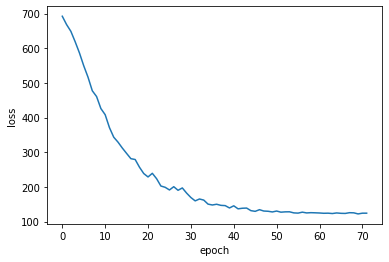

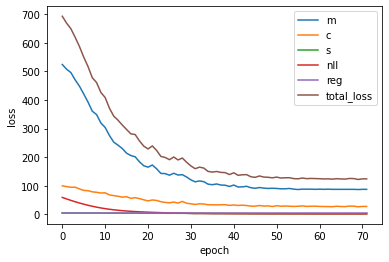

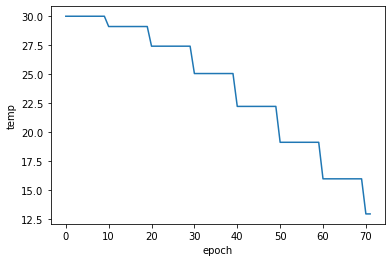

============================== INTERMEDIATE TREE ==============================

Iteration: 0, Intermediate best tree idx 15
soft_X torch.Size([11, 5]) 
 tensor([[0.2131, 0.1929, 0.1898, 0.2137, 0.1905],
        [0.2110, 0.2030, 0.1824, 0.2013, 0.2023],
        [0.2057, 0.1782, 0.2068, 0.1850, 0.2243],
        [0.2130, 0.1932, 0.2050, 0.2137, 0.1750],
        [0.2243, 0.1868, 0.1963, 0.1913, 0.2013],
        [0.1800, 0.2057, 0.2137, 0.1984, 0.2021],
        [0.1864, 0.1931, 0.2046, 0.2131, 0.2028],
        [0.2068, 0.1915, 0.2008, 0.1883, 0.2125],
        [0.2047, 0.1836, 0.2081, 0.2033, 0.2004],
        [0.1949, 0.2148, 0.2014, 0.1952, 0.1938],
        [0.1988, 0.1954, 0.2132, 0.1947, 0.1980]], requires_grad=True)
Migration number: 20.0
Comigration number: 12.0
Seeding site number: 5.0
Neg log likelihood: 6.851
Reg: 5.0
Loss: 276.851


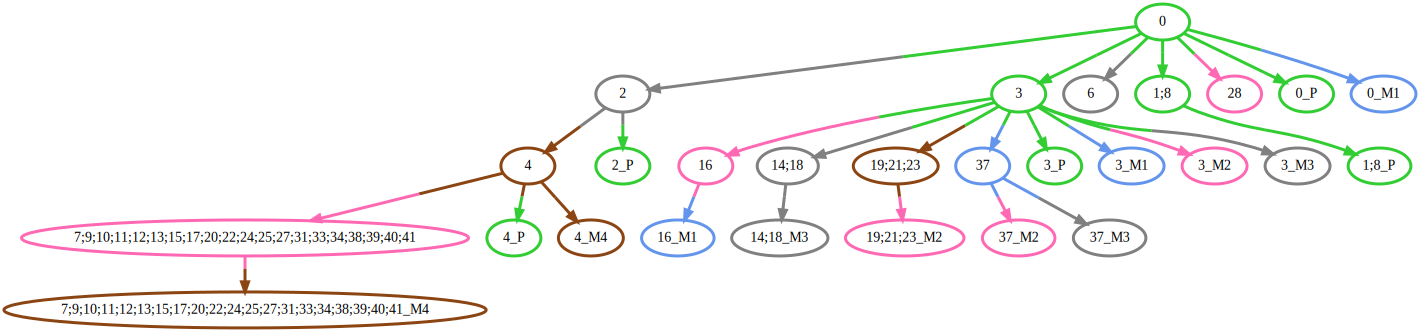

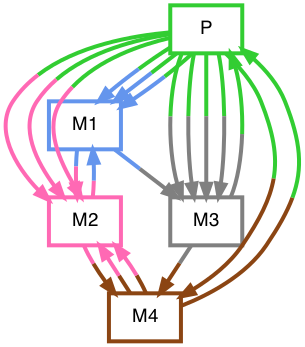

============================== INTERMEDIATE TREE ==============================

Iteration: 20, Intermediate best tree idx 15
soft_X torch.Size([11, 5]) 
 tensor([[0.2272, 0.1856, 0.1909, 0.2171, 0.1792],
        [0.2405, 0.1897, 0.1872, 0.1739, 0.2087],
        [0.2336, 0.1703, 0.1877, 0.1751, 0.2333],
        [0.2433, 0.1855, 0.1804, 0.2052, 0.1856],
        [0.2500, 0.2117, 0.1785, 0.1744, 0.1853],
        [0.1855, 0.2146, 0.2033, 0.1981, 0.1986],
        [0.1802, 0.2098, 0.1784, 0.2061, 0.2255],
        [0.2023, 0.1867, 0.2295, 0.1726, 0.2089],
        [0.2443, 0.1899, 0.2129, 0.1776, 0.1753],
        [0.1801, 0.2106, 0.1902, 0.2146, 0.2046],
        [0.1984, 0.1733, 0.2032, 0.1892, 0.2360]], requires_grad=True)
Migration number: 9.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 2.282
Reg: 5.0
Loss: 124.282


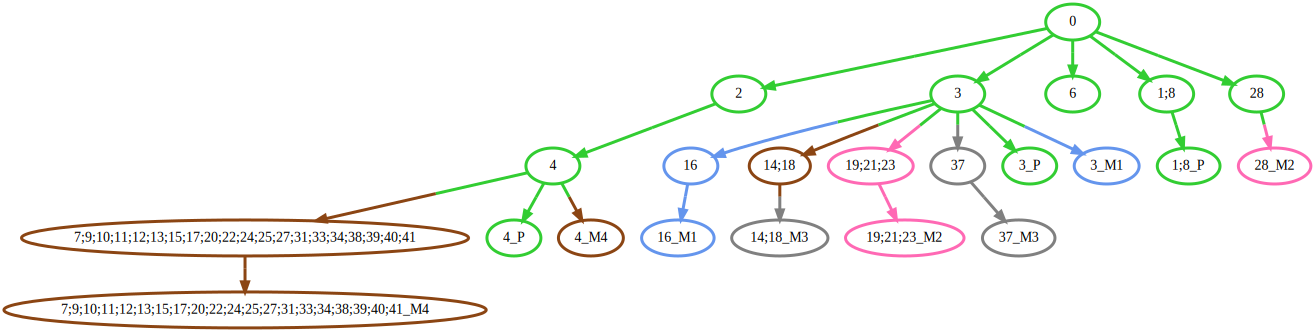

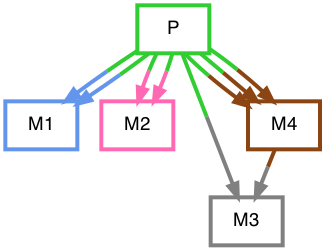

============================== INTERMEDIATE TREE ==============================

Iteration: 40, Intermediate best tree idx 15
soft_X torch.Size([11, 5]) 
 tensor([[0.2952, 0.1640, 0.1654, 0.1997, 0.1757],
        [0.2671, 0.2103, 0.1528, 0.1803, 0.1895],
        [0.2756, 0.1527, 0.1575, 0.1499, 0.2643],
        [0.3251, 0.1701, 0.1759, 0.1610, 0.1679],
        [0.3330, 0.1609, 0.1613, 0.1615, 0.1833],
        [0.1842, 0.2637, 0.1892, 0.1629, 0.2000],
        [0.1813, 0.1724, 0.1778, 0.2792, 0.1892],
        [0.2228, 0.1516, 0.2934, 0.1496, 0.1826],
        [0.2765, 0.1556, 0.2371, 0.1772, 0.1537],
        [0.2127, 0.1958, 0.1689, 0.2492, 0.1735],
        [0.1826, 0.1615, 0.1982, 0.1818, 0.2759]], requires_grad=True)
Migration number: 8.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 1.737
Reg: 4.999999523162842
Loss: 107.737


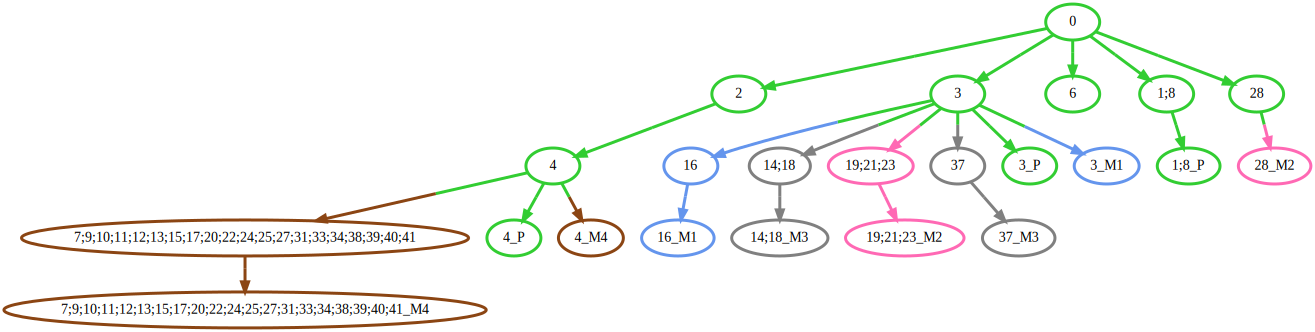

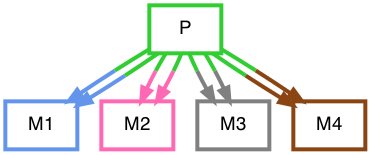

****************************** BEST TREE ******************************

Migration number: 8.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 1.248
Reg: 4.705937385559082
Loss: 106.954


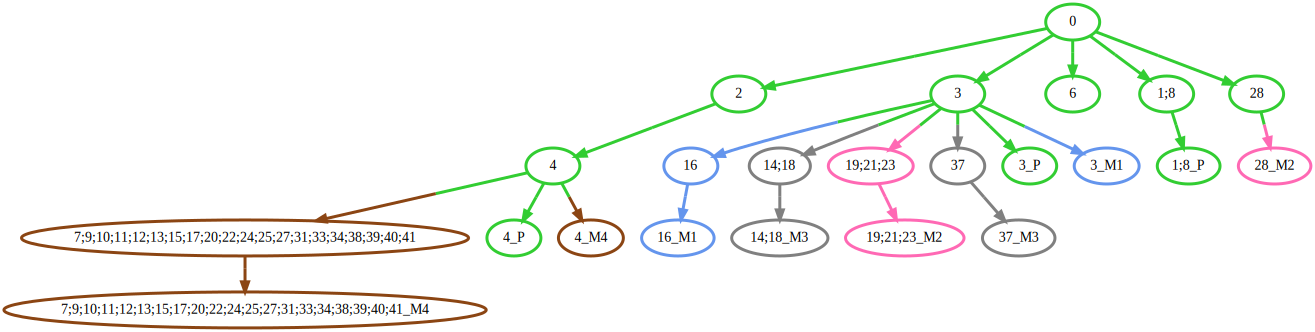

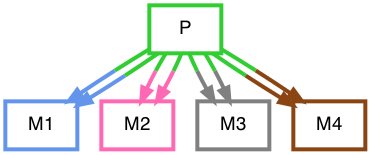

****************************************************************************************************
TREE 2
G
 None
{0: '0', 1: '2', 2: '3', 3: '4', 4: '6', 5: '1;8', 6: '16', 7: '14;18', 8: '19;21;23', 9: '28', 10: '37', 11: '7;9;10;11;12;13;15;17;20;22;24;25;27;31;33;34;38;39;40;41'}
['P', 'M1', 'M2', 'M3', 'M4']
weights:
{'comig': 5.0,
 'data_fit': 1.0,
 'gen_dist': 0.5,
 'mig': 10.0,
 'reg': 1.0,
 'seed_site': 1.0}
max_iter: 100 lr: 0.1 init_temp: 30 final_temp: 0.01 batch_size: 16


KeyboardInterrupt: 

In [26]:
%%time

find_labelings_all_mutation_trees(os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_mut_trees", f"mut_trees_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.tsv"),
                                  use_gen_dist=False)




num trees: 1
TREE 1
G
 tensor([[0., 1., 3., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
{0: '0', 1: '1', 2: '6;7;8', 3: '4;16', 4: '17', 5: '18'}
['P', 'M1', 'M2', 'M3', 'M4']
weights:
{'comig': 5.0,
 'data_fit': 1.0,
 'gen_dist': 0.5,
 'mig': 10.0,
 'reg': 1.0,
 'seed_site': 1.0}
max_iter: 100 lr: 0.1 init_temp: 30 final_temp: 0.01 batch_size: 16


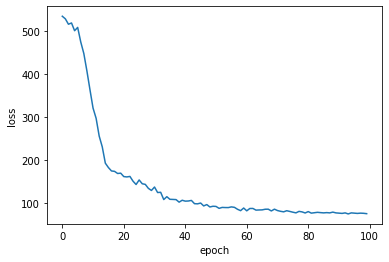

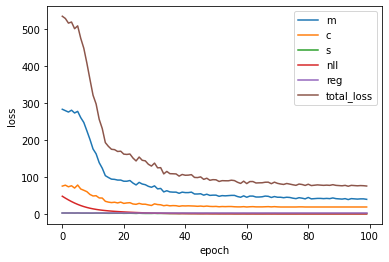

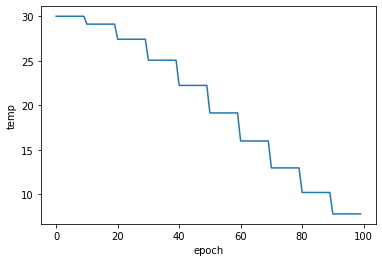

============================== INTERMEDIATE TREE ==============================

Iteration: 0, Intermediate best tree idx 11
soft_X torch.Size([5, 5]) 
 tensor([[0.2169, 0.2020, 0.1874, 0.1917, 0.2019],
        [0.2181, 0.1899, 0.1982, 0.1839, 0.2098],
        [0.2083, 0.1902, 0.1934, 0.1906, 0.2176],
        [0.1861, 0.2170, 0.1939, 0.1918, 0.2111],
        [0.1960, 0.1864, 0.1999, 0.2198, 0.1979]], requires_grad=True)
Migration number: 10.0
Comigration number: 6.0
Seeding site number: 3.0
Neg log likelihood: 6.286
Reg: 4.999999523162842
Genetic distance: 66.0
Loss: 177.286


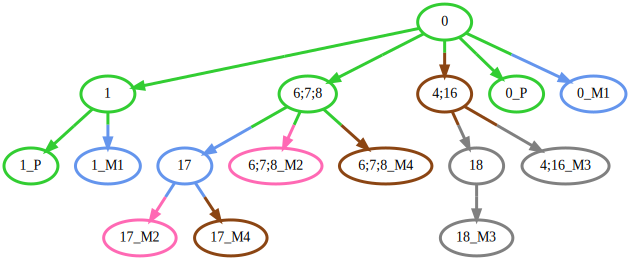

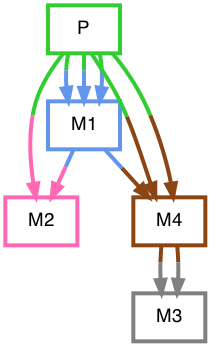

============================== INTERMEDIATE TREE ==============================

Iteration: 20, Intermediate best tree idx 11
soft_X torch.Size([5, 5]) 
 tensor([[0.2294, 0.2221, 0.1742, 0.1707, 0.2036],
        [0.1840, 0.1852, 0.2314, 0.1763, 0.2231],
        [0.2586, 0.1732, 0.1747, 0.2093, 0.1843],
        [0.1650, 0.1920, 0.2552, 0.1657, 0.2222],
        [0.2220, 0.1703, 0.1988, 0.2174, 0.1915]], requires_grad=True)
Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.997
Reg: 5.0
Genetic distance: 47.0
Loss: 112.497


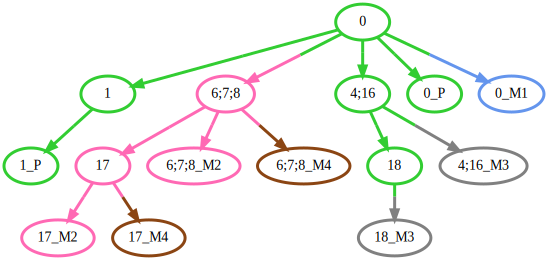

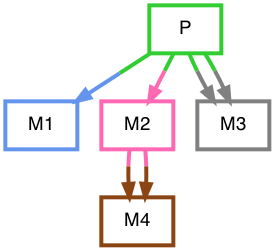

============================== INTERMEDIATE TREE ==============================

Iteration: 40, Intermediate best tree idx 11
soft_X torch.Size([5, 5]) 
 tensor([[0.3134, 0.2128, 0.1585, 0.1479, 0.1674],
        [0.1710, 0.1651, 0.2665, 0.1427, 0.2548],
        [0.2438, 0.1603, 0.1603, 0.2663, 0.1693],
        [0.1595, 0.1673, 0.2758, 0.1460, 0.2514],
        [0.2034, 0.1568, 0.1708, 0.2709, 0.1980]], requires_grad=True)
Migration number: 5.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.511
Reg: 5.0
Genetic distance: 25.0
Loss: 91.011


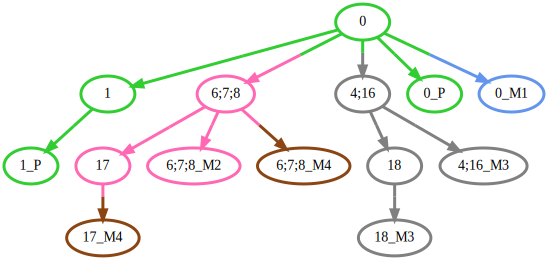

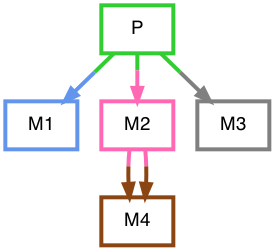

============================== INTERMEDIATE TREE ==============================

Iteration: 60, Intermediate best tree idx 11
soft_X torch.Size([5, 5]) 
 tensor([[0.4853, 0.1792, 0.1292, 0.0978, 0.1085],
        [0.1335, 0.0971, 0.3542, 0.0871, 0.3282],
        [0.2698, 0.1165, 0.1259, 0.3672, 0.1206],
        [0.0975, 0.1108, 0.2925, 0.1094, 0.3898],
        [0.1792, 0.1157, 0.1442, 0.4417, 0.1192]], requires_grad=True)
Migration number: 5.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.386
Reg: 5.0
Genetic distance: 14.0
Loss: 85.386


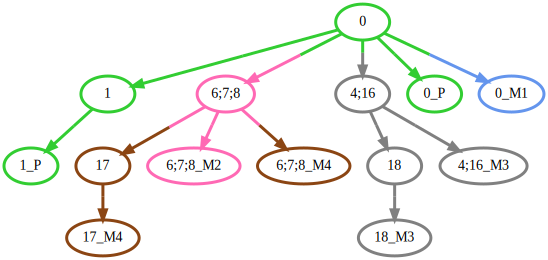

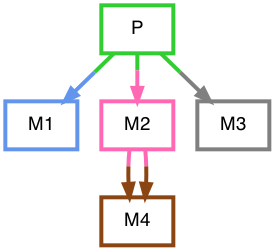

****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 1.147
Reg: 4.867896556854248
Genetic distance: 14.0
Loss: 85.015


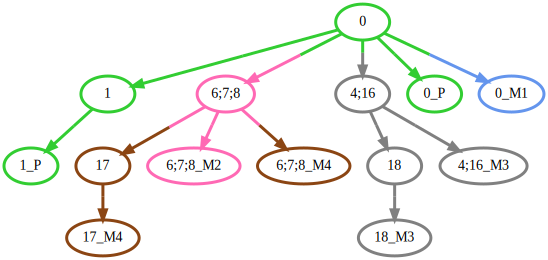

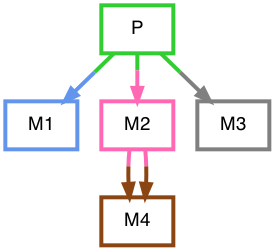

****************************************************************************************************
CPU times: user 4.76 s, sys: 6.54 s, total: 11.3 s
Wall time: 5.35 s


In [21]:
%%time

find_labelings_all_mutation_trees(os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_mut_trees", f"mut_trees_{mig_type}_seed{SEED}.txt"),
                                  os.path.join(MACHINA_DATA_DIR, f"{num_sites}_clustered_input", f"cluster_{mig_type}_seed{SEED}.tsv"),
                                  use_gen_dist=True)




In [8]:
p = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/test/machina_simulated_data/predictions_wm3_wc2_wg0.5_bs32_11032022"
p = os.path.join(p, num_sites, mig_type)
visualize_ground_truth(os.path.join(p, f"T_tree0_seed{SEED}.predicted.tree"), os.path.join(p, f"G_tree0_seed{SEED}.predicted.tree"))


FileNotFoundError: [Errno 2] No such file or directory: '/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/test/machina_simulated_data/predictions_wm3_wc2_wg0.5_bs32_11032022/m8/mS/T_tree0_seed8.predicted.dot'

tree > 50 trees m8 M 172 180
m8 M 314
tree > 50 trees m8 mS 12 108
m8 mS 138
m8 R 166
tree > 50 trees m8 S 2 144
tree > 50 trees m8 S 0 192
tree > 50 trees m8 S 31 60
m8 S 443
tree > 50 trees m5 M 473 80
m5 M 184
m5 mS 33
tree > 50 trees m5 R 2155 120
tree > 50 trees m5 R 247 78
m5 R 286
m5 S 83
[4, 6, 6, 2, 180, 12, 6, 48, 48, 2, 1, 8, 2, 8, 2, 2, 4, 108, 1, 2, 8, 20, 2, 2, 10, 48, 16, 32, 12, 16, 6, 144, 192, 6, 4, 4, 24, 60, 2, 1, 4, 4, 12, 80, 2, 30, 8, 24, 12, 8, 1, 3, 2, 4, 4, 2, 2, 2, 1, 12, 4, 2, 8, 8, 12, 48, 4, 2, 120, 78, 4, 4, 1, 2, 1, 4, 36, 4, 12, 15]


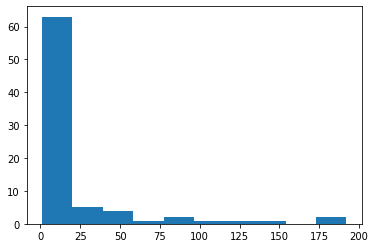

Number of total trees: 1647


NameError: name 'RERUN_SIM_DIR' is not defined

In [6]:
import fnmatch
import matplotlib.pyplot as plt
def count_trees(sims_data_dir):
    sites = ["m8", "m5"]
    mig_types = ["M", "mS", "R", "S"]
    tree_cts = []
    ct = 0
    seed_ct = 0
    for site in sites:
        for mig_type in mig_types:
            local_ct = 0
            site_mig_data_dir = os.path.join(sims_data_dir, site, mig_type)
            seeds = fnmatch.filter(os.listdir(site_mig_data_dir), 'reads_seed*.tsv')
            seeds = [s.replace(".tsv", "").replace("reads_seed", "") for s in seeds]
            for seed in seeds:
                all_mut_trees_fn = os.path.join(sims_data_dir, f"{site}_mut_trees", f"mut_trees_{mig_type}_seed{seed}.txt")
                with open(all_mut_trees_fn, 'r') as f:
                    for line in f:
                        if "#trees" in line:
                            tree_ct = int(line.split()[0])
                            tree_cts.append(tree_ct)
                            if tree_ct > 50:
                                print("tree > 50 trees", site, mig_type, seed, tree_ct)
                            ct += tree_ct
                            local_ct += tree_ct
                            break
                seed_ct += 1
            print(site, mig_type, local_ct)
    print(tree_cts)
    plt.hist(tree_cts)
    plt.show()
    plt.close()
    print("Number of total trees:", ct)

count_trees(MACHINA_DATA_DIR)
count_trees(RERUN_SIM_DIR)

In [ ]:
mig_type = "S"
SEED = 23

RERUN_SIM_DIR = os.path.join(repo_dir, 'src/data/rerun_machina_sims')
RERUN_SIM_DATA_DIR = os.path.join(RERUN_SIM_DIR, num_sites, mig_type)

print("Manually generated sims")
visualize_ground_truth(os.path.join(RERUN_SIM_DATA_DIR, f"T_seed{SEED}.dot"), os.path.join(RERUN_SIM_DATA_DIR, f"G_seed{SEED}.dot"))
